In [1]:
import xgboost as xgb
import shap 
import numpy as np
import pandas as pd
import matplotlib.pylab as pl
import graphviz
shap.initjs()

In [2]:
#import XGBoost model from R into python
rmodel = xgb.Booster(model_file = 'Master.XGBModel')

In [3]:
#import data set into python
qsprdf = pd.read_csv("xgbpython.csv")

tracer = qsprdf['Tracer']
qspr = qsprdf.drop(['Tracer', 'Tracer_Conc'], axis=1)

In [4]:
#assign X and Y for predictions
Y = qsprdf['Tracer_Conc']
X = qspr
d_test = xgb.DMatrix(X, label=Y)

In [5]:
#get predictions
ypred = rmodel.predict(d_test)

In [6]:
#print predictions 
ypred

array([-8.352652 , -8.060762 , -7.5125847, ...,  7.1664925,  7.5196075,
        7.72823  ], dtype=float32)

In [7]:
#XGBoost predictions in logit form for export to .csv
pred = pd.DataFrame(ypred)
#pred.to_csv(r'C:\Users\kdubs\downloads\predictions.csv', index = False, header=True)

In [8]:
#for waterfall and forceplots
explainer = shap.TreeExplainer(rmodel)
shap_values = explainer(X)     
#for dependence plots
shap_values2 = explainer.shap_values(X)  

In [9]:
#print shap values 
shap_values

.values =
array([[-1.0490670e+01,  3.4847119e-01, -9.5063321e-02, ...,
         2.2338088e-01,  5.1459232e-03, -2.5746219e-02],
       [-1.0230636e+01,  4.6258864e-01, -2.0019193e-01, ...,
         2.3806982e-01,  5.1459232e-03, -2.5746219e-02],
       [-9.9091177e+00,  5.1758021e-01, -1.8212323e-01, ...,
         2.4668235e-01,  5.1459232e-03, -2.5746219e-02],
       ...,
       [ 8.8585443e+00, -2.4214178e-01, -9.5442785e-03, ...,
        -1.0429260e-02, -4.3217018e-03, -4.6438238e-04],
       [ 9.0487337e+00, -2.2583956e-01, -9.5442785e-03, ...,
        -1.0429260e-02, -4.3217018e-03, -4.6438238e-04],
       [ 9.1601067e+00, -2.1315636e-01, -9.5442785e-03, ...,
         1.3179120e-02, -4.3217018e-03, -4.6438238e-04]], dtype=float32)

.base_values =
array([0.98285145, 0.98285145, 0.98285145, ..., 0.98285145, 0.98285145,
       0.98285145], dtype=float32)

.data =
array([[1.495890e+01, 2.273170e+03, 5.490000e+00, ..., 2.545000e+00,
        1.000000e+00, 2.500000e-01],
       [1.539630

In [10]:
#export shap values as a .csv file
shapnums = pd.DataFrame(shap_values2)
shapnums
#shapnums.to_csv(r'C:\Users\kdubs\downloads\shap.csv', index = False, header=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-10.490670,0.348471,-0.095063,0.338634,0.0,0.003717,0.107811,0.190535,0.020952,-0.004977,0.0,0.003590,0.0,0.038716,0.223381,0.005146,-0.025746
1,-10.230636,0.462589,-0.200192,0.342436,0.0,0.003717,0.107811,0.190535,0.028855,-0.004977,0.0,0.003590,0.0,0.035187,0.238070,0.005146,-0.025746
2,-9.909118,0.517580,-0.182123,0.482963,0.0,0.003717,0.107811,0.190535,0.028855,-0.004977,0.0,0.003590,0.0,0.039648,0.246682,0.005146,-0.025746
3,-9.609864,0.444864,-0.127021,0.491046,0.0,0.003717,0.107811,0.200822,0.029911,-0.004977,0.0,0.003590,0.0,0.103894,0.307733,0.005146,-0.034842
4,-9.335354,0.511309,-0.127021,0.503588,0.0,0.003717,0.107811,0.200822,0.029911,-0.004977,0.0,0.003590,0.0,0.103894,0.307733,0.005146,-0.034842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,8.551845,-0.259184,-0.009544,-0.658056,0.0,-0.008090,-0.031816,-0.101843,-1.236080,-0.000427,0.0,-0.006555,0.0,-0.527690,-0.071515,-0.004322,-0.000464
75996,8.664092,-0.259184,-0.009544,-0.601393,0.0,-0.008090,-0.031816,-0.101843,-1.236080,-0.000427,0.0,-0.006555,0.0,-0.527690,-0.021763,-0.004322,-0.000464
75997,8.858544,-0.242142,-0.009544,-0.553417,0.0,-0.008090,-0.031816,-0.101843,-1.178162,-0.000427,0.0,-0.006555,0.0,-0.527690,-0.010429,-0.004322,-0.000464
75998,9.048734,-0.225840,-0.009544,-0.541062,0.0,-0.008090,-0.031816,-0.101843,-1.178162,-0.000427,0.0,-0.006555,0.0,-0.393422,-0.010429,-0.004322,-0.000464


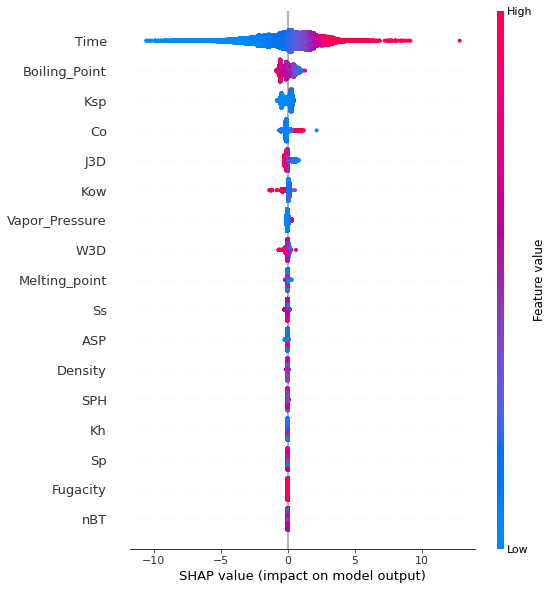

In [11]:
#shap summary plot
shap.summary_plot(shap_values)

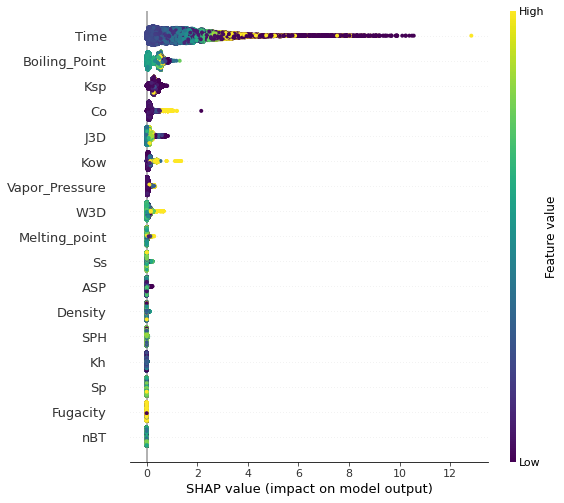

In [12]:
import matplotlib.pyplot as plt
shap.plots.beeswarm(shap_values.abs, color=plt.get_cmap("viridis"),max_display = 17)

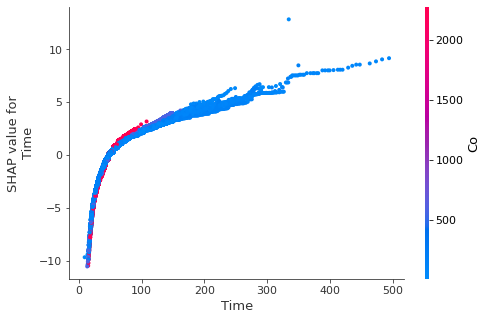

In [13]:
#shap dependence plot for Time and Co interaction
shap.dependence_plot("Time", shap_values2, X, interaction_index="Co")

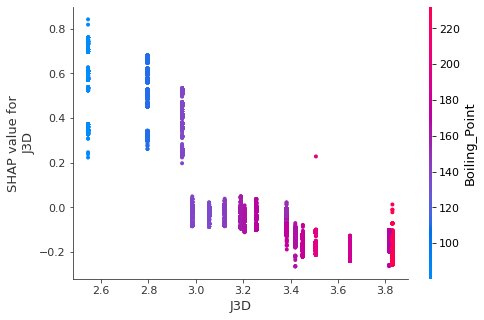

In [14]:
#shap dependence plot for J3D and Boiling point interaction
shap.dependence_plot("J3D", shap_values2, X, interaction_index="Boiling_Point")

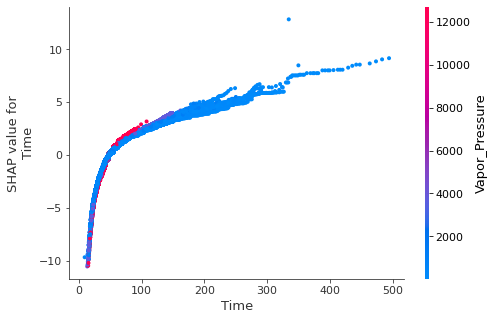

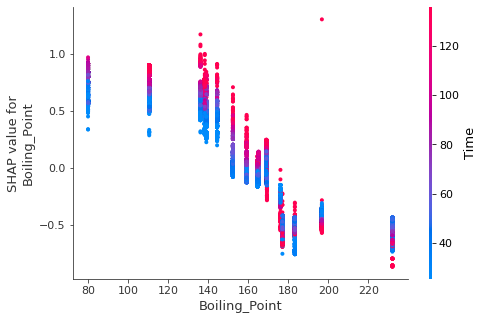

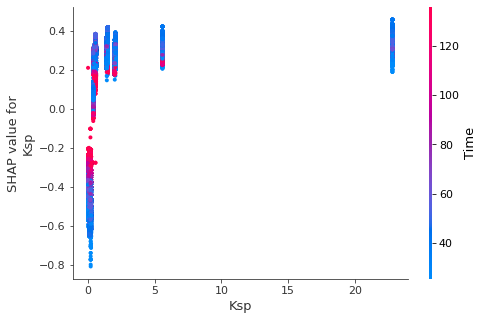

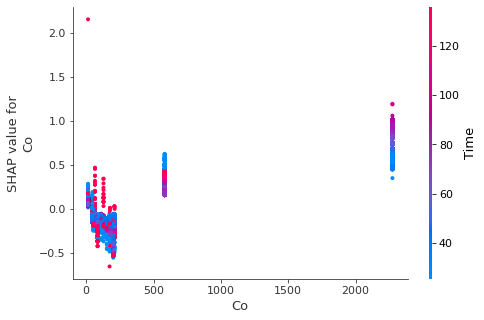

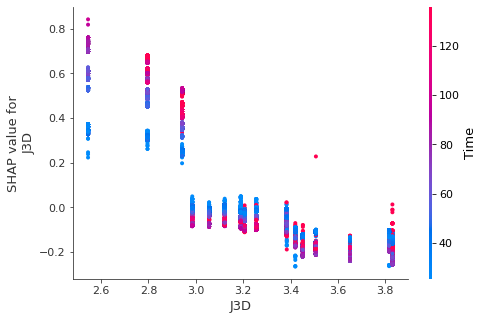

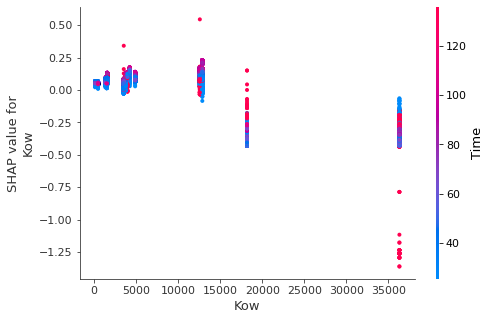

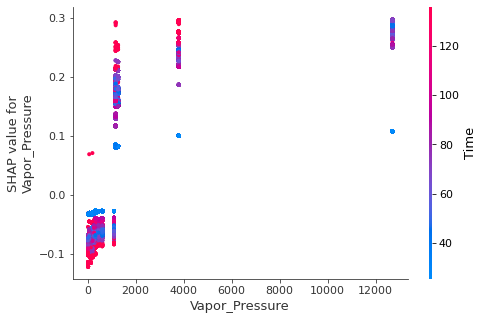

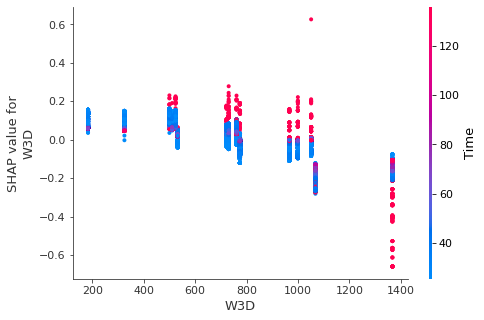

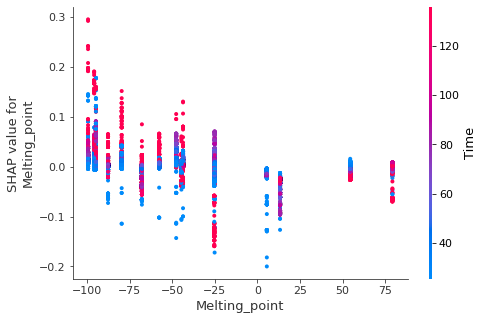

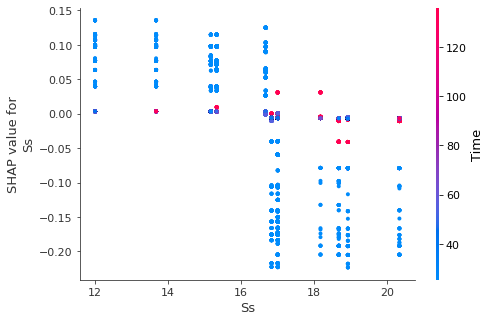

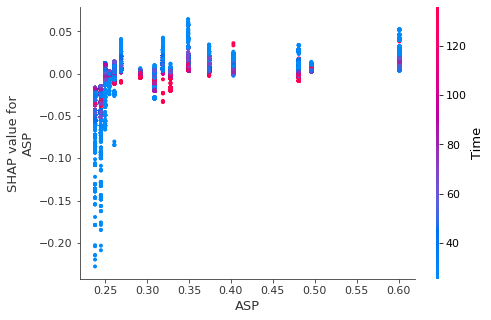

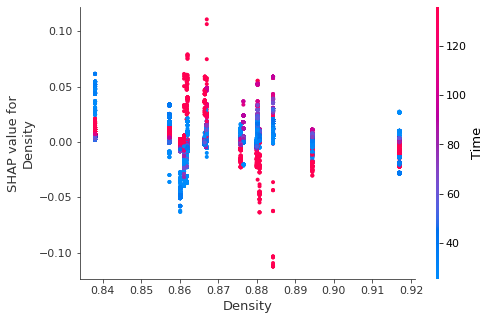

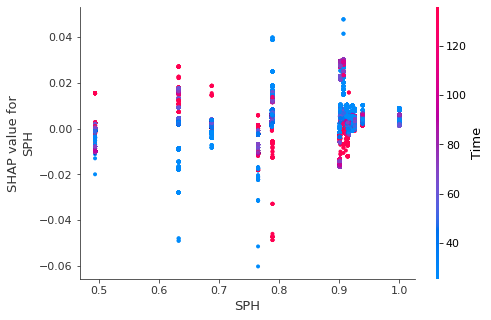

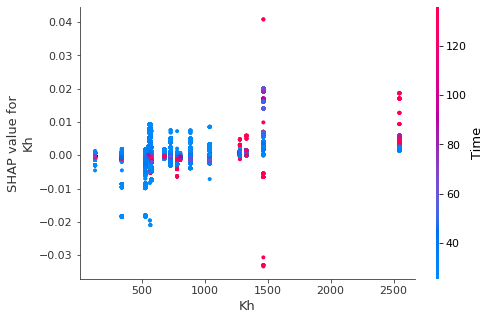

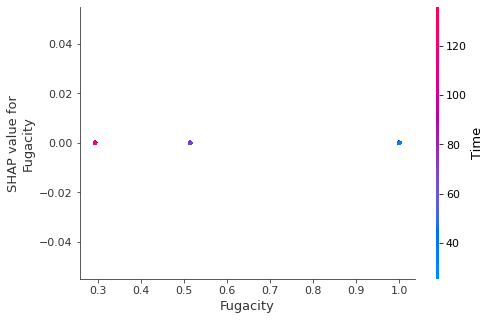

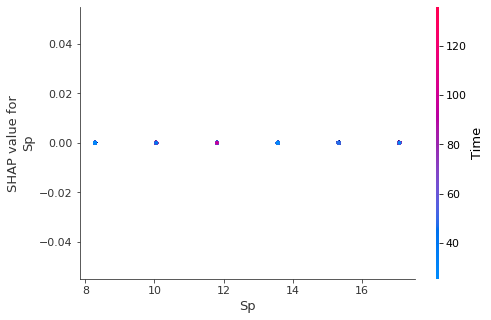

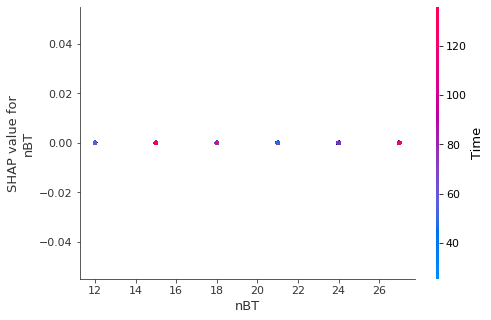

In [15]:
top_inds = np.argsort(-np.sum(np.abs(shap_values2), 0))

# make SHAP dependence plots of the each features
for i in range(17):
    shap.dependence_plot(top_inds[i], shap_values2, X)

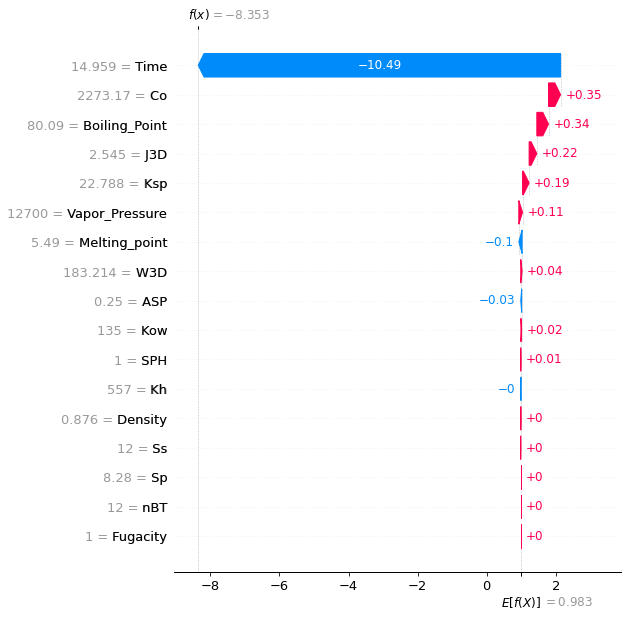

In [16]:
shap.plots.waterfall(shap_values[0], max_display = 17)

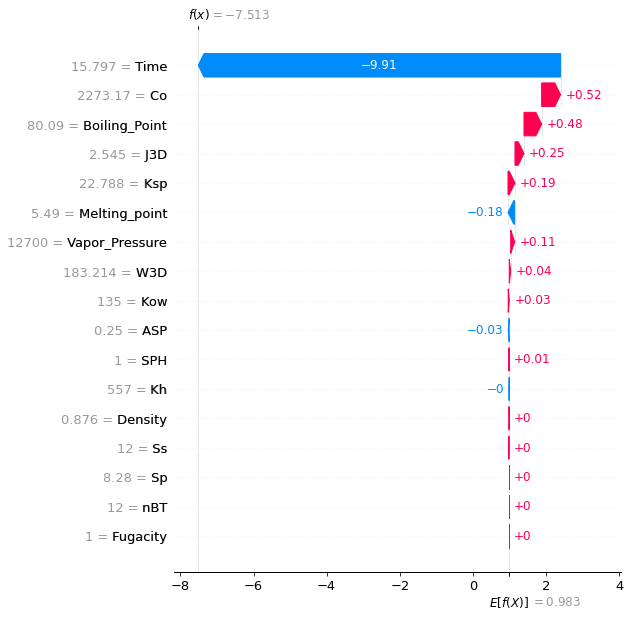

In [17]:
shap.plots.waterfall(shap_values[2], max_display = 17)

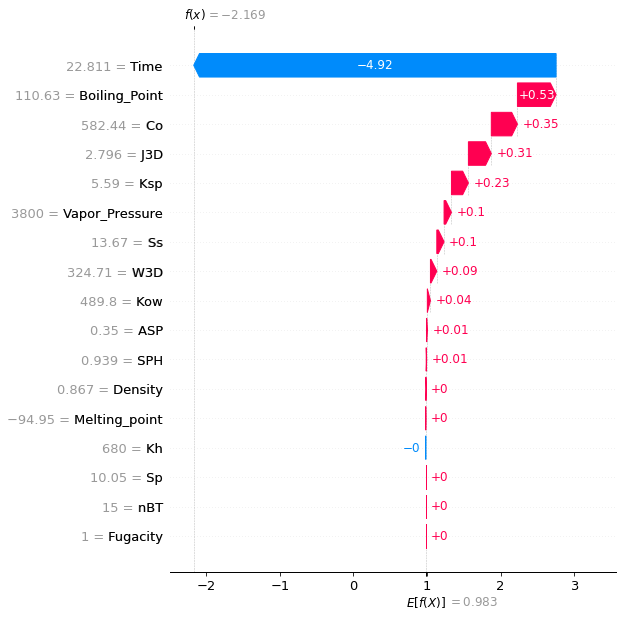

In [18]:
shap.plots.waterfall(shap_values[4200], max_display = 17)